In [15]:
import librosa
import matplotlib.pyplot as plt
import numpy as np

In [16]:
#all the audio samples are single-channel(mono)
audio,sampleRate=librosa.load("audioData/Animals/Bird/ffb86d3c_nohash_0.wav")
sampleRate

22050

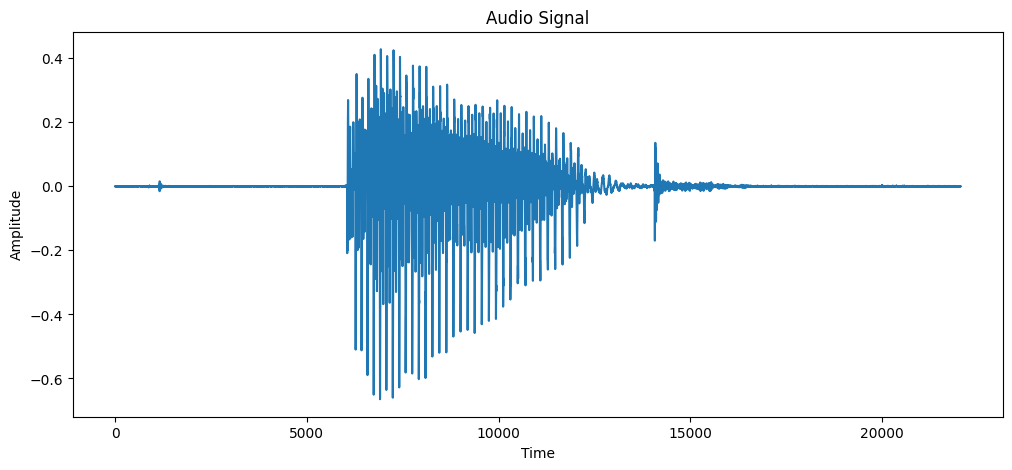

In [24]:
#Time vs Amplitude Graph of wav file
plt.figure(figsize=(12,5))
plt.plot(audio)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Audio Signal")
plt.show()

In [25]:
# To generate MFCC, we follow the following steps:
# audioInput -> pre-emphasis -> framing -> windowing -> fourier transform -> Inverse Mel Scale Filter Bank -> Log() -> DCT ->
# Derivatives -> Feature Vector
#
# Since audio input is just one sound, we do not require framing and windowing

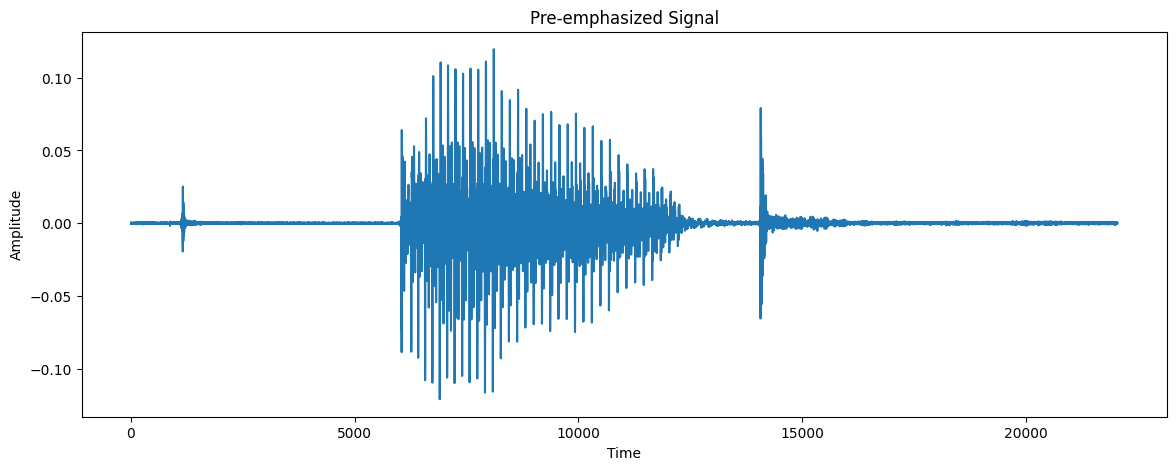

In [26]:
#Pre-emphasis layer
#Amplifies higher frequencies
pre_emphasis = 0.97
audio_preemphasized = np.append(audio[0], audio[1:] - pre_emphasis * audio[:-1])

# Plot the pre-emphasized signal
plt.figure(figsize=(14, 5))
plt.plot(audio_preemphasized)
plt.title('Pre-emphasized Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

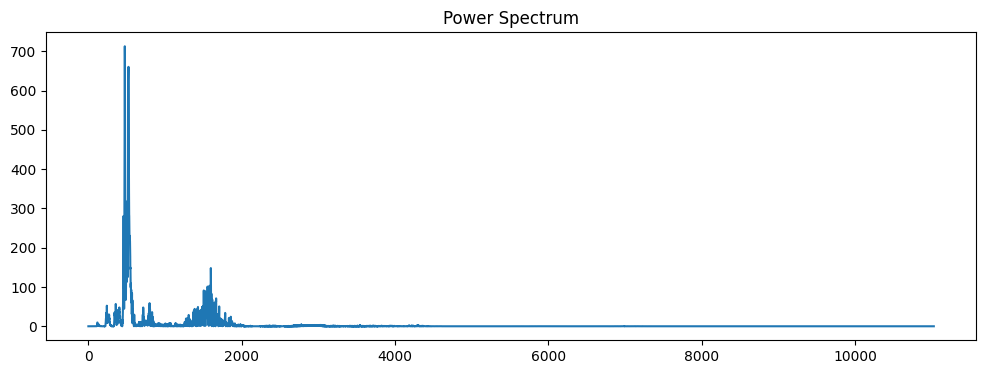

In [27]:
# FFT(Fast Fourier Transform) Layer
# Used to convert time-domain signal to frequency-domain to analyze frequency components of speech.
# Output of FFT gives complex frequency spectrum (both magnitude and phase)
# Since we only need magnitude, we evaluate the power spectrum from the output of FFT

complex_power_spectrum=np.fft.rfft(audio_preemphasized)
power_spectrum=pow(np.abs(complex_power_spectrum),2)

plt.figure(figsize=(12,4))
plt.plot(power_spectrum)
plt.title("Power Spectrum")
plt.show()